<a href="https://colab.research.google.com/github/zhems/Complete-Python-3-Bootcamp/blob/master/Dashboard_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage

In [0]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
from operator import methodcaller

In [0]:
def stockchart(symbol,interval,past_days):
    while True:
        try:
            ts = TimeSeries(key='XCMSFDTYUZGLCJBS', output_format='pandas')
            data, meta_data = ts.get_intraday(symbol=symbol,interval=interval, outputsize='full')
            data.index = pd.to_datetime(data.index)
            data_length = len(data)
            data = data[data_length-past_days*24:]
            data_length = len(data)
            bounds = []
            for v in range(data_length-1):
                if data.index[v].date()!=data.index[v+1].date():
                    bounds = bounds + [v]
            data['timestamp']=data.index
            data.index=range(data_length)
            
                
            data['new_index'] = range(data_length)
            data['new_index'] = data['new_index'].apply(str)
            for i in bounds:
                data.loc[i,'new_index'] = data['timestamp'][i].strftime('%Y-%m-%d')
            data.index = data['new_index']
            #data['date']=data['timestamp'].map(methodcaller('strftime', '%Y-%m-%d, %H:%M:%S'))
            
            plt.figure(figsize=(17,4))
            plt.plot(data['4. close'],label = symbol,color='C3')
            plt.title(symbol + ' Stock Price (' + interval + ')')
            #plt.xlabel('Time')
            plt.ylabel(symbol + ' Stock Price')
            plt.xticks(bounds)
            #plt.legend()
            for i in bounds:
                plt.axvline(x=i,ls='--',color='lightgrey')
            plt.show()
            
        except KeyError:
            time.sleep(70)
            continue
            
        except IndexError:
            break
            
        break
            

In [0]:
def movingaverage_chart(symbol,interval,time_period,series_type,past_days):
    while True:
        try:
            #Base historical stock data
            ts = TimeSeries(key='4R5NDTM0D1HKQA9V', output_format='pandas')
            data_price, meta_data_price = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
            data_price_length=len(data_price)
            data_price = data_price[data_price_length-past_days:]
            
            
            ti = TechIndicators(key='MY2FVAV6O66MO17X', output_format='pandas')
            
            #SMA data
            data_SMA, meta_data_SMA = ti.get_sma(symbol=symbol,interval=intervalSMA,
                                     time_period=time_period,series_type=series_type)
            t_SMA=data_SMA.index==data_price.index[0]
            start_SMA = [i for i, x in enumerate(t_SMA) if x]
            
            
            #EMA data
            #data_EMA, meta_data_EMA = ti.get_ema(symbol=symbol,interval=intervalSMA,
            #                         time_period=time_period,series_type=series_type)
            #t_EMA=data_EMA.index==data_price.index[0]
            #start_EMA = [i for i, x in enumerate(t_EMA) if x]
            
            
            #Plotting
            data_price_length=len(data_price)
            plt.figure(figsize=(17,4))
            plt.plot(data_price['4. close'],label = 'actual price',color='C3')
            plt.plot(data_SMA['SMA'][start_SMA[0]:],label = 'SMA',color='C2')
            #plt.plot(data_EMA['EMA'][start_EMA[0]:],label = 'EMA',color='C1')
            #plt.xlabel('Date')
            plt.xticks(range(0,data_price_length,10),rotation=30)
            for i in range(0,data_price_length,10):
                plt.axvline(x=i,ls='--',color='lightgrey')
            plt.ylabel(symbol + ' Stock Price')
            plt.legend()
            plt.show()
            
        except KeyError:
            time.sleep(70)
            continue
            
        except IndexError:
            break
            
        break
            

In [0]:
symbols_A = ['AMZN', 'NFLX', 'BABA']
symbols_B = ['SPOT', 'JD', 'TSLA']
symbols_C = ['SBUX', 'FB', 'AAPL']
symbols_D = ['GSK', 'UA', 'NTDOY']
symbols_E = ['PM', 'GOOG', 'FIT']
symbols_F = ['DATA', 'QCOM'] #, 'LYFT'
interval = '15min'
intervalSMA = 'daily'
time_period = 100
series_type = 'close'
past_days_short = 10
past_days_long = 200

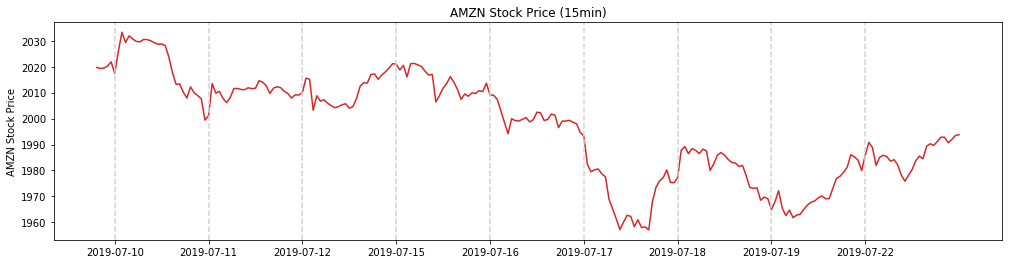

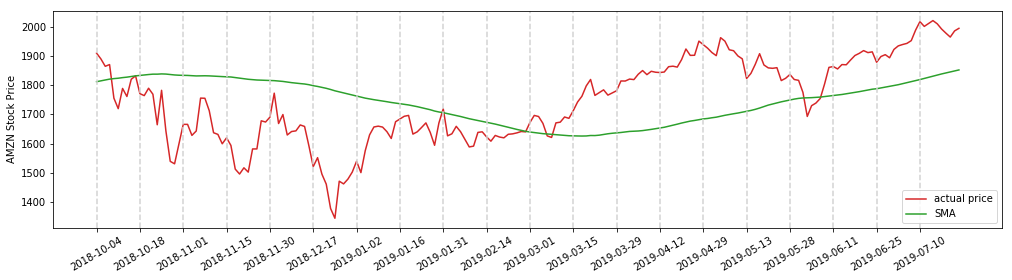

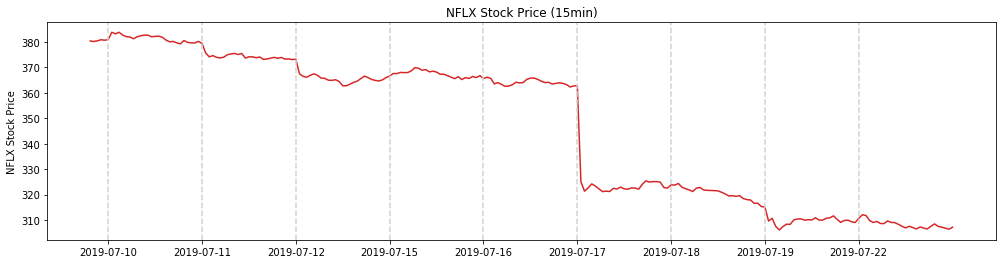

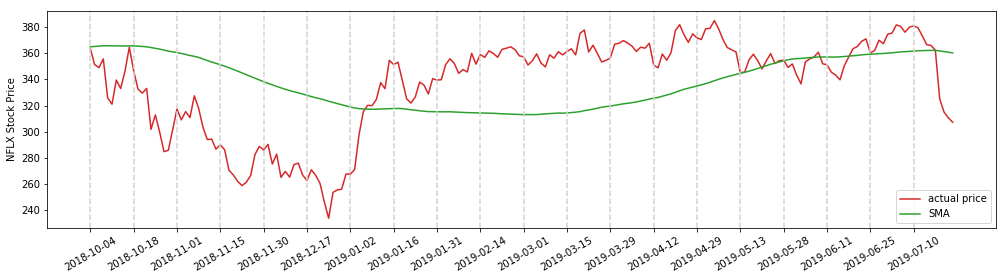

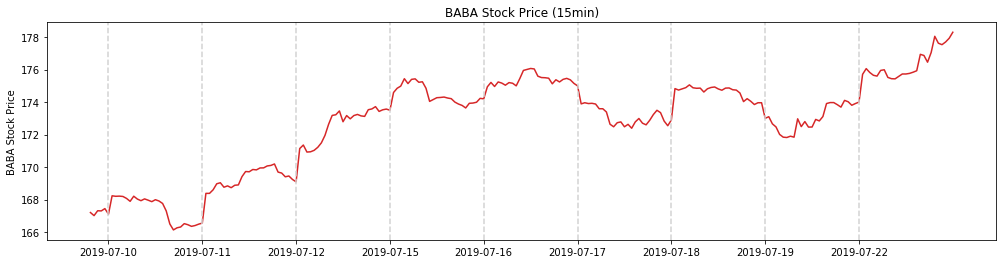

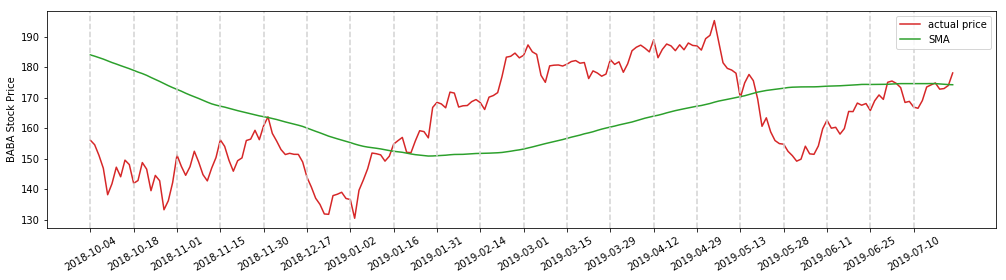

In [6]:
for sym in symbols_A:
    stockchart(sym,interval,past_days_short)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days_long)

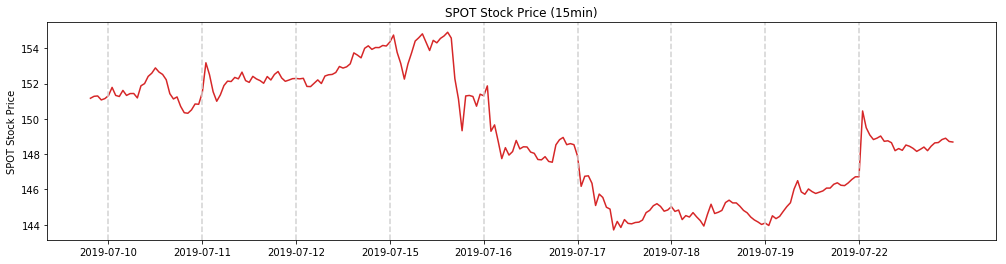

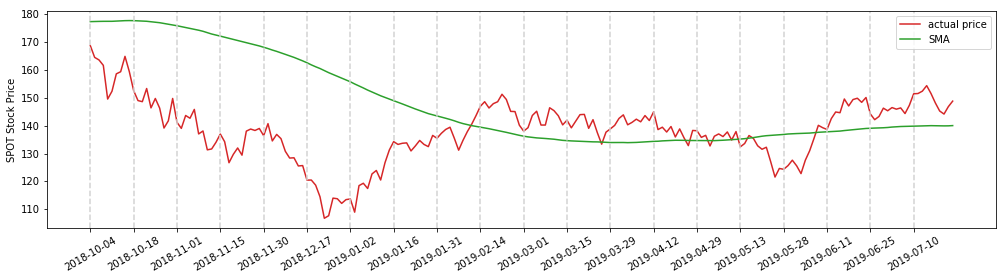

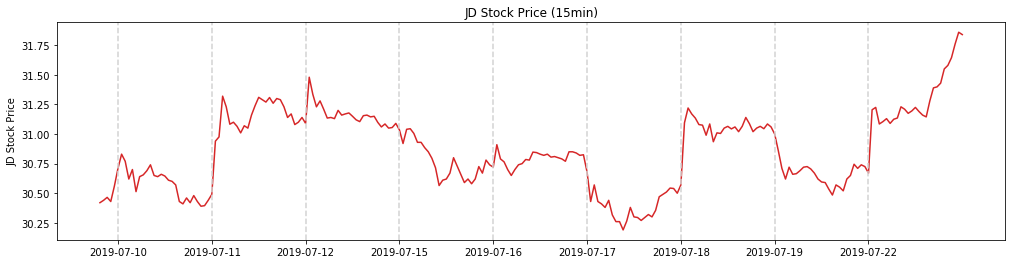

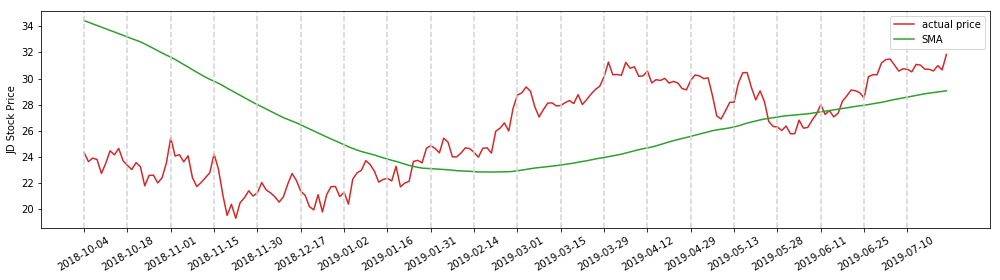

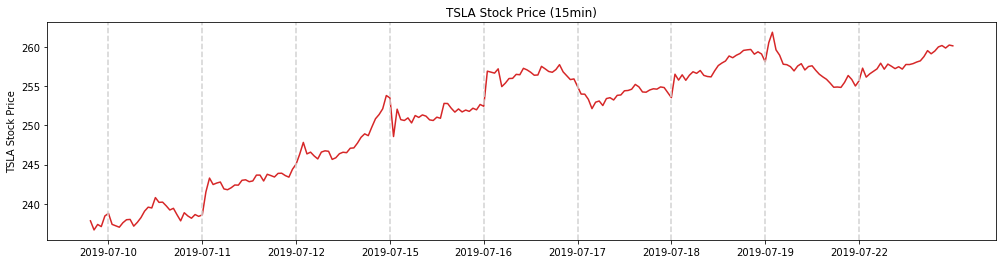

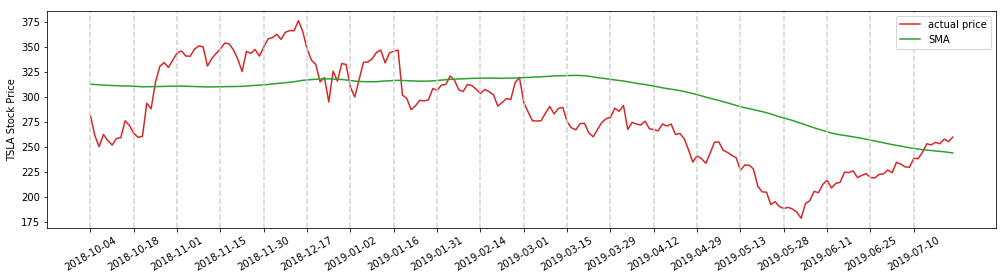

In [7]:
for sym in symbols_B:
    stockchart(sym,interval,past_days_short)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days_long)

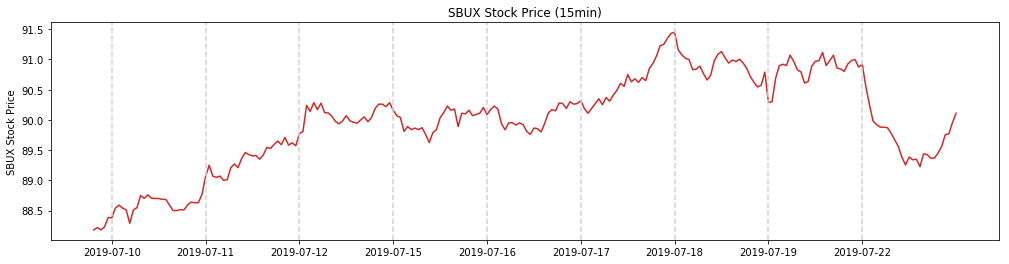

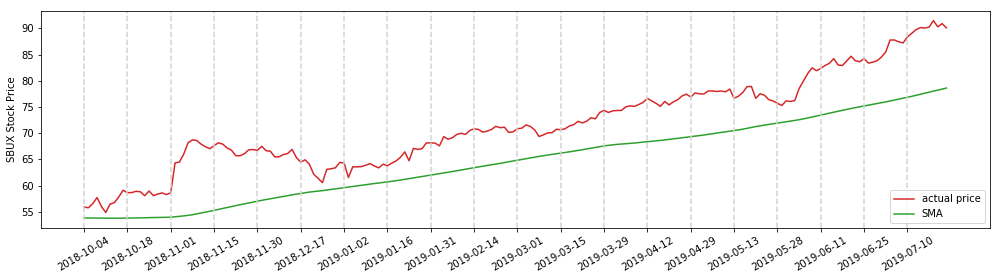

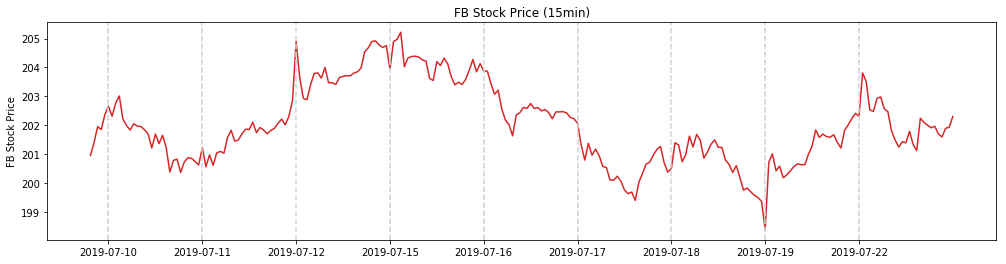

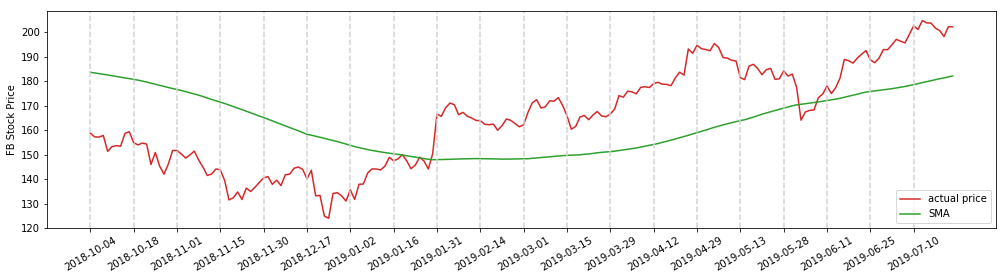

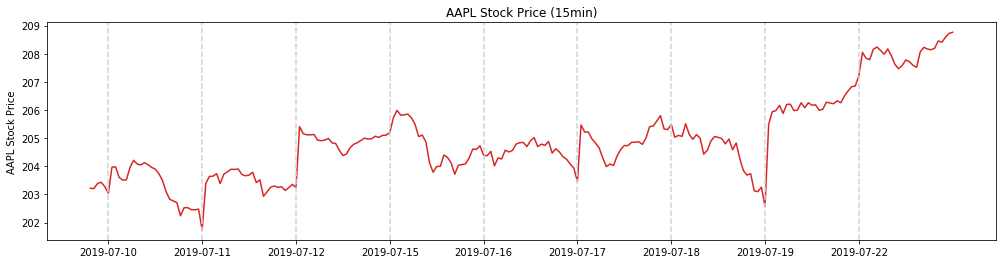

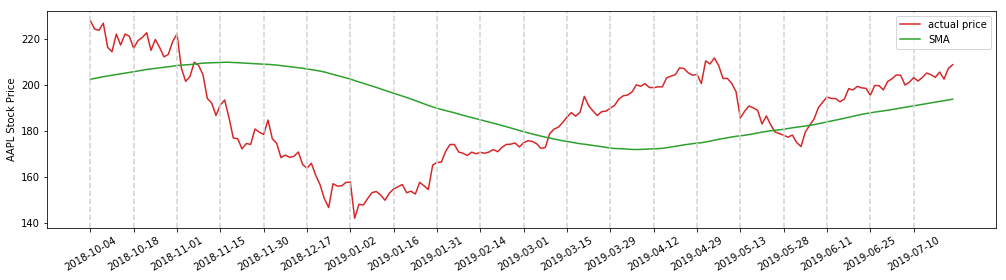

In [8]:
for sym in symbols_C:
    stockchart(sym,interval,past_days_short)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days_long)

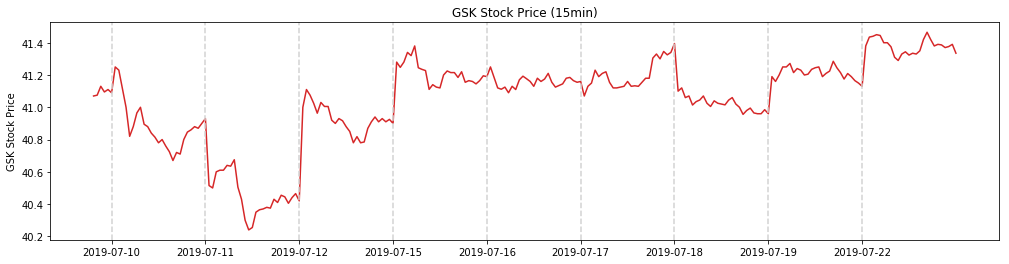

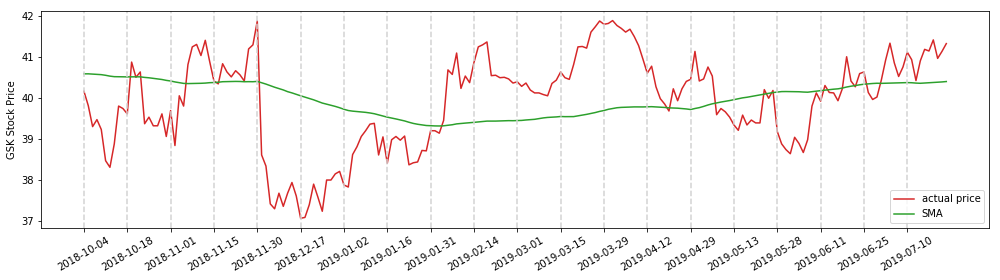

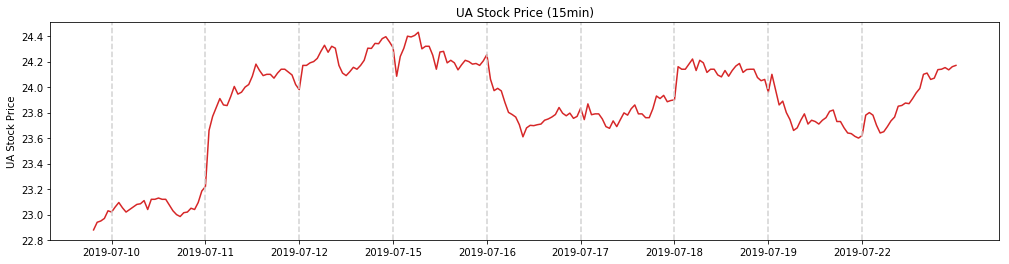

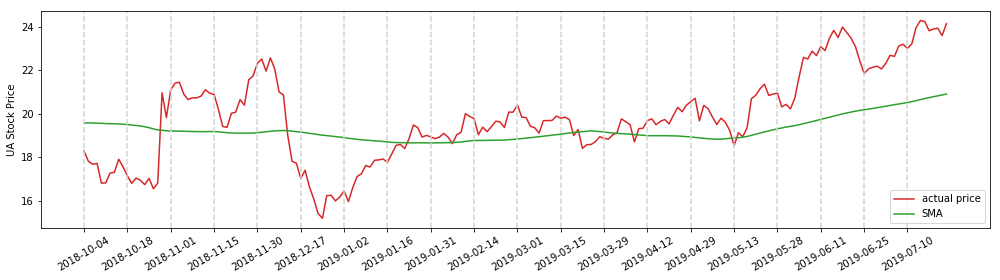

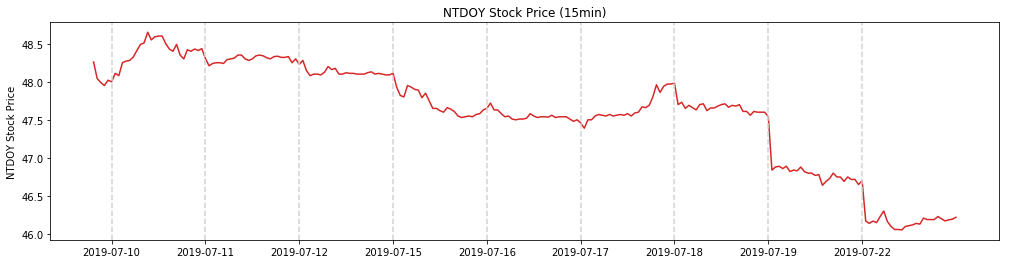

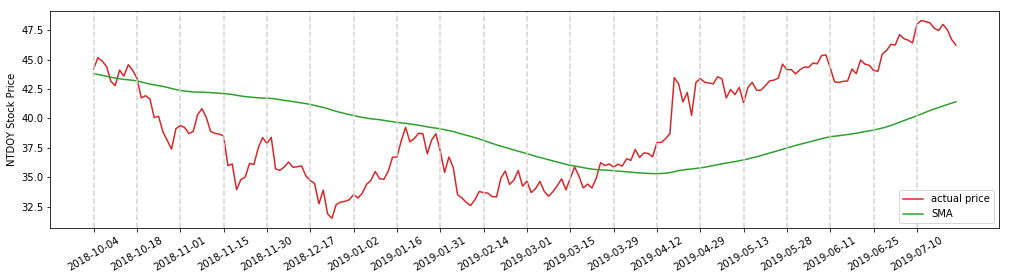

In [9]:
for sym in symbols_D:
    stockchart(sym,interval,past_days_short)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days_long)

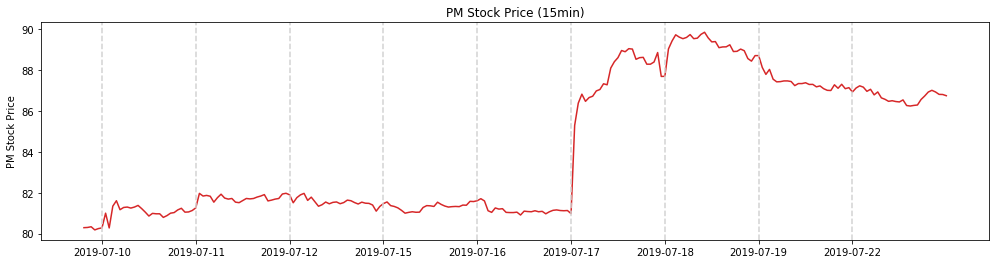

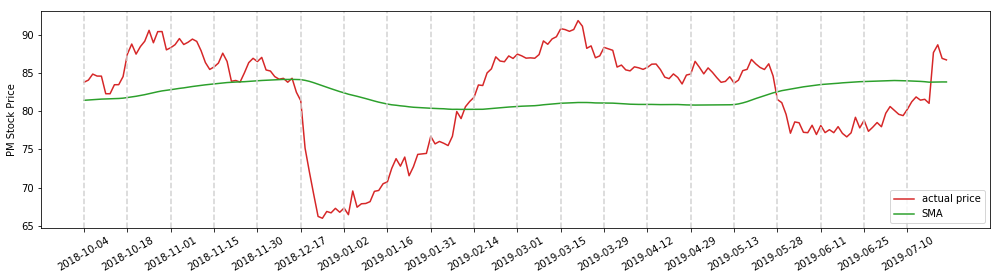

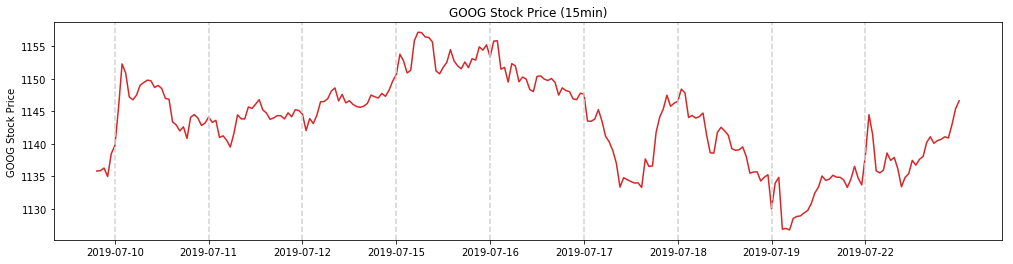

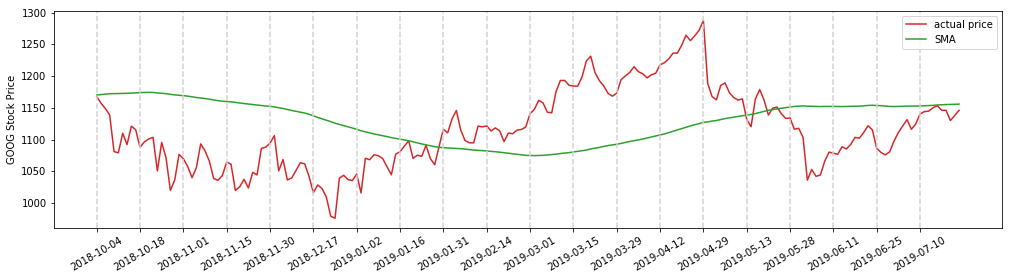

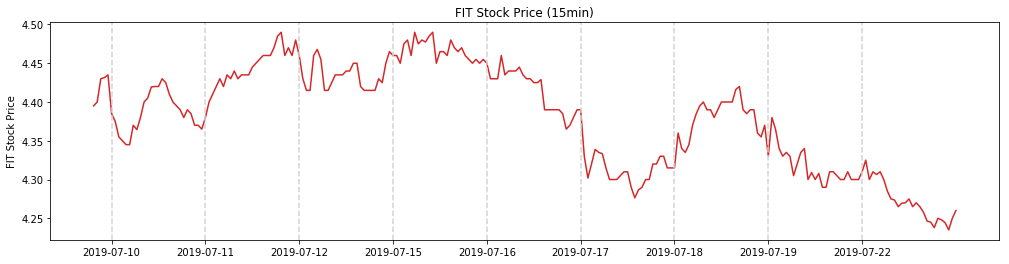

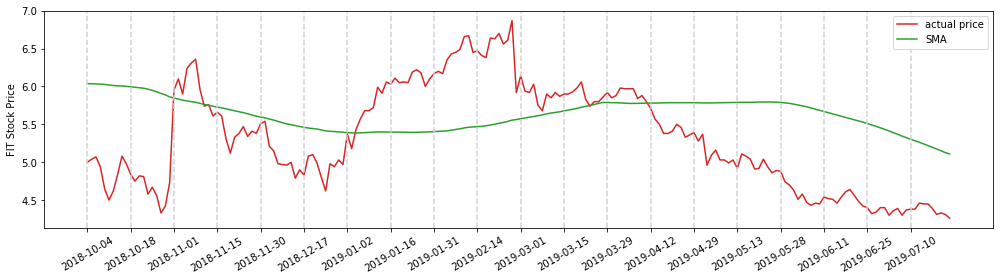

In [10]:
for sym in symbols_E:
    stockchart(sym,interval,past_days_short)
    movingaverage_chart(sym,intervalSMA,time_period,series_type,past_days_long)